# Tweets con keyword complejas
Se considera que un tweet tiene una keyword compleja si es que su keyword está compuesta por más de una palabra.\
Para filtrar los tweets con keyword compleja se filtra el texto del keyword por aquellos que tienen la palabra'%20' separando dos palabras.\
Como se describió anteriormente: existen 36 keywords complejas distribuídas en 1165 tweets.

In [2]:
import pandas as pd

In [9]:
tweets = spotify_songs = pd.read_csv('Data/train.csv')
tweets['length'] = tweets['text'].str.len()
tweets['has_keyword'] = tweets['keyword'].notnull().astype(int)

tweets.head()

,id,keyword,location,text,target,length,has_keyword
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,0


In [16]:
keyword_tweets = tweets[tweets['has_keyword'] == 1]
keyword_tweets = keyword_tweets[keyword_tweets['keyword'].str.contains('%20')]
del(keyword_tweets['has_keyword'])
keyword_tweets.describe()

,id,target,length
count,1165.000000,1165.000000,1165.000000
mean,5089.259227,0.583691,107.970815
std,3120.770967,0.493158,30.361213
min,196.000000,0.000000,7.000000
25%,1791.000000,0.000000,87.000000
50%,5416.000000,1.000000,116.000000
75%,7315.000000,1.000000,135.000000
max,10484.000000,1.000000,152.000000


In [17]:
keyword_tweets.head()

,id,keyword,location,text,target,length
136,196,airplane%20accident,"19.600858, -99.047821",Experts in France begin examining airplane deb...,1,136
137,197,airplane%20accident,Pennsylvania,Strict liability in the context of an airplane...,1,136
138,198,airplane%20accident,"Salt Lake City, Utah",@crobscarla your lifetime odds of dying from a...,0,80
139,199,airplane%20accident,"Palo Alto, CA",Experts in France begin examining airplane deb...,1,136
140,201,airplane%20accident,NaN,@AlexAllTimeLow awwww they're on an airplane a...,1,104


In [21]:
keywords_complex = keyword_tweets['keyword'].value_counts().to_frame().reset_index()
keywords_complex.columns = ['keyword', 'count']
keywords_complex.head(40)

,keyword,count
0,body%20bags,41
1,oil%20spill,38
2,burning%20buildings,37
3,nuclear%20reactor,36
4,dust%20storm,36
5,cliff%20fall,36
6,suicide%20bomb,35
7,airplane%20accident,35
8,structural%20failure,35
9,emergency%20plan,35


In [22]:
keywords_complex['count'].sum()

1165

In [23]:
# Tweet en general.
true_tweets = tweets['target'].sum()
false_tweets = tweets['target'].count() - true_tweets
print(tweets['target'].count())
print(true_tweets)
print(false_tweets)

7613
3271
4342


In [24]:
# Tweet en con keywords complejas.
true_tweets_keyword = keyword_tweets['target'].sum()
false_tweets_keyword = keyword_tweets['target'].count() - true_tweets_keyword
print(keyword_tweets['target'].count())
print(true_tweets_keyword)
print(false_tweets_keyword)

1165
680
485


Text(0, 0.5, 'Frecuencia del Target')

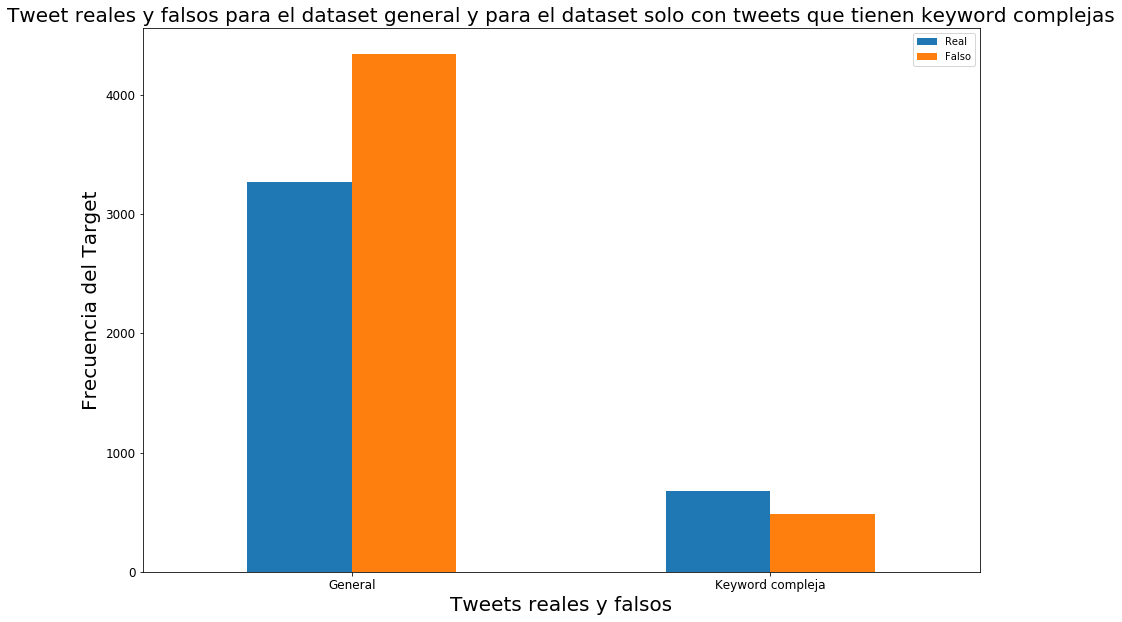

In [28]:
plot_index = ['General', 'Keyword compleja']
plot_data_true = [ true_tweets, true_tweets_keyword ]
plot_data_false = [ false_tweets, false_tweets_keyword ]
plot_data = { 'Real' : plot_data_true, 'Falso' : plot_data_false }
plot_dataframe = pd.DataFrame(plot_data, index=plot_index)
plot = plot_dataframe.plot(kind='bar',\
                           fontsize=12,\
                           linewidth=2,\
                           figsize=(15,10),\
                           stacked=False, rot=0)
plot.set_title('Tweet reales y falsos para el dataset general y para el dataset solo con tweets que tienen keyword complejas', fontsize=20)
plot.set_xlabel("Tweets reales y falsos", fontsize=20)
plot.set_ylabel("Frecuencia del Target", fontsize=20)

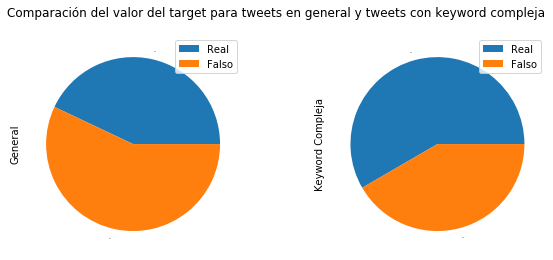

In [34]:
plot_data_general = [ true_tweets, false_tweets ]
plot_data_keywords = [ true_tweets_keyword, false_tweets_keyword ]
plot_data_index = [ 'Real', 'Falso' ]
plot_data = { 'General' : plot_data_general, 'Keyword Compleja' : plot_data_keywords }
plot_dataframe = pd.DataFrame(plot_data, index=plot_data_index)
plot = plot_dataframe.plot.pie(subplots=True,\
                               figsize=(10, 4), \
                               title='Comparación del valor del target para tweets en general y tweets con keyword compleja',\
                               fontsize=0)